
Data Preprocessing:
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the dataset


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df=pd.read_csv("EastWestAirlines.csv")


In [46]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [47]:
#missing values
df.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [48]:
df.duplicated().sum()

np.int64(0)

In [49]:
df.describe()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [51]:
#removing the id column from data
df.drop('ID#',axis=1,inplace=True)

In [52]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [53]:
#removing the outliers
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [57]:
print("rows before removing outliers",df.shape[0])
print('rows after removing outliers ',df_clean.shape[0])

rows before removing outliers 3999
rows after removing outliers  2875


In [58]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_clean)
scaled_data=pd.DataFrame(df_scaled,columns=df_clean.columns)

In [59]:
df_clean=df_clean.copy()

In [60]:
scaled_data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,2.875000e+03,2875.0,2.875000e+03,2875.0,2875.0,2.875000e+03,2.875000e+03,2.875000e+03,2.875000e+03,2.875000e+03,2.875000e+03
mean,-7.908650e-17,0.0,-7.908650e-17,0.0,0.0,-5.931487e-17,8.402940e-17,1.482872e-17,2.965744e-17,-7.908650e-17,9.885812e-18
std,1.000174e+00,0.0,1.000174e+00,0.0,0.0,1.000174e+00,1.000174e+00,1.000174e+00,1.000174e+00,1.000174e+00,1.000174e+00
min,-1.098253e+00,0.0,-7.190547e-01,0.0,0.0,-7.958670e-01,-1.210728e+00,-3.788372e-01,-4.097077e-01,-1.917616e+00,-6.230716e-01
25%,-7.408945e-01,0.0,-7.190547e-01,0.0,0.0,-7.592685e-01,-9.527351e-01,-3.788372e-01,-4.097077e-01,-8.672958e-01,-6.230716e-01
50%,-3.171815e-01,0.0,-7.190547e-01,0.0,0.0,-4.664800e-01,-4.975903e-02,-3.788372e-01,-4.097077e-01,-5.967701e-02,-6.230716e-01
75%,4.492551e-01,0.0,1.013789e+00,0.0,0.0,4.549983e-01,7.242205e-01,-3.788372e-01,-4.097077e-01,8.020114e-01,1.604952e+00
max,3.656806e+00,0.0,2.746632e+00,0.0,0.0,3.404329e+00,3.691142e+00,4.711239e+00,3.716071e+00,2.137849e+00,1.604952e+00


<Figure size 1200x1000 with 0 Axes>

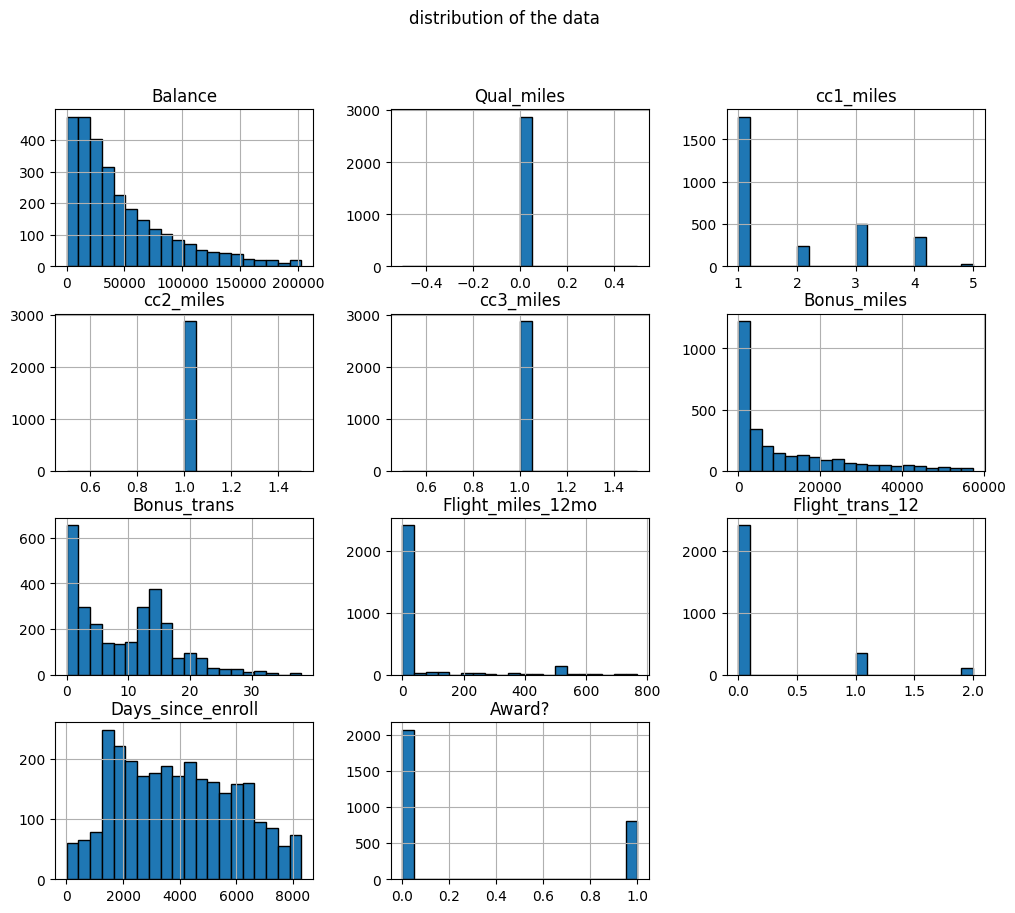

In [61]:
#various visulaization plot of the dataset
#histogram plot
plt.figure(figsize=(12,10))
df_clean.hist(figsize=(12,10),bins=20,edgecolor='black')
plt.suptitle("distribution of the data")
plt.show()

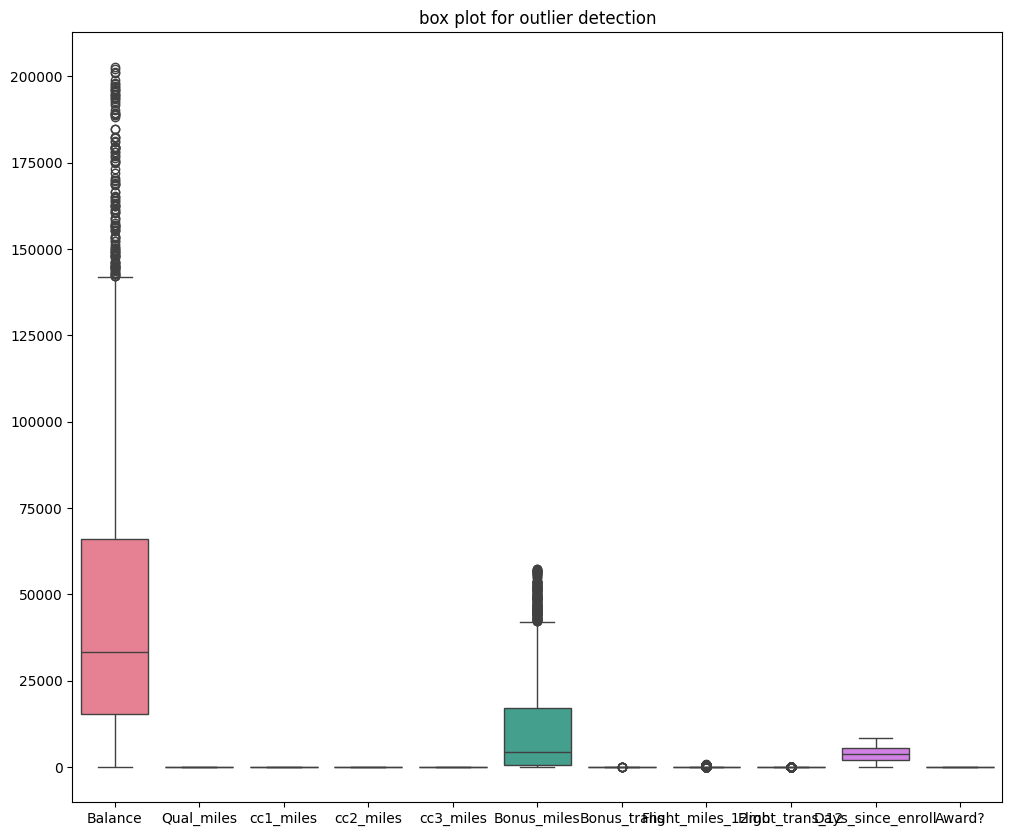

In [62]:
#boxplot
plt.figure(figsize=(12,10))
sns.boxplot(data=df_clean)
plt.title("box plot for outlier detection")
plt.show()

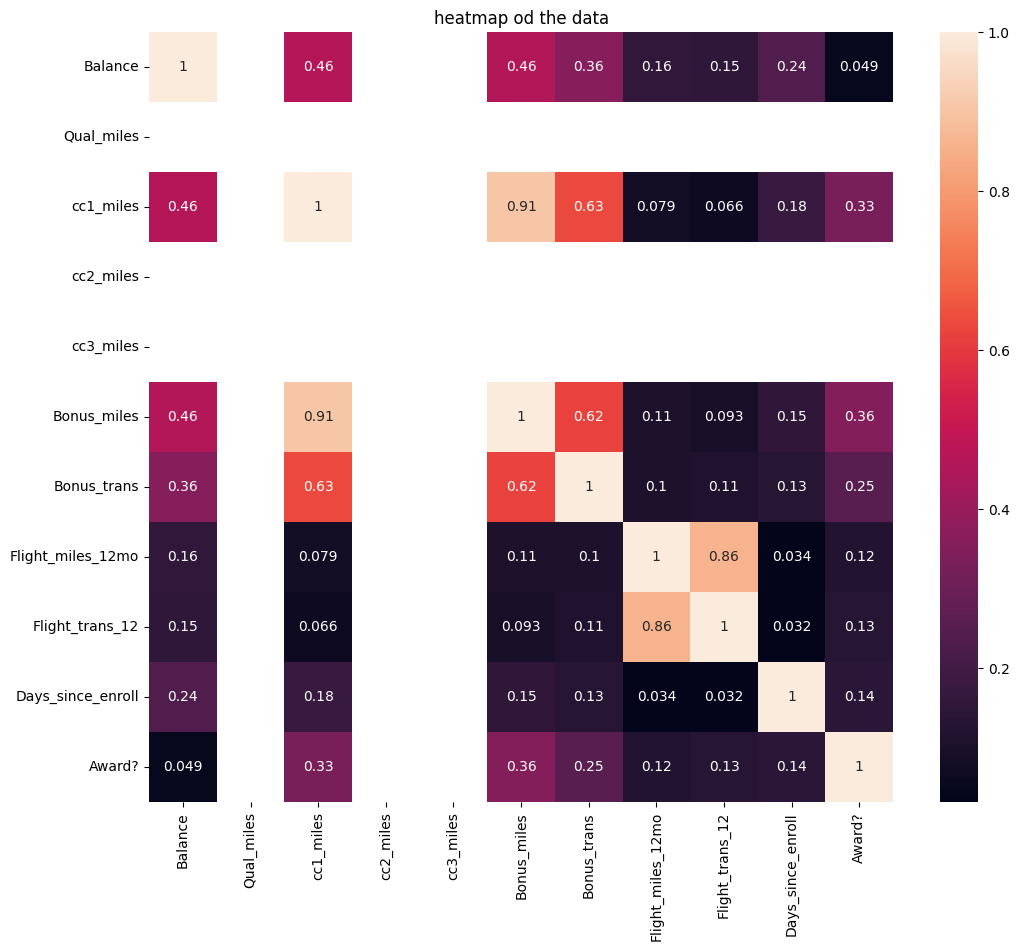

In [63]:

#heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df_clean.corr(),annot=True)
plt.title("heatmap od the data")
plt.show()

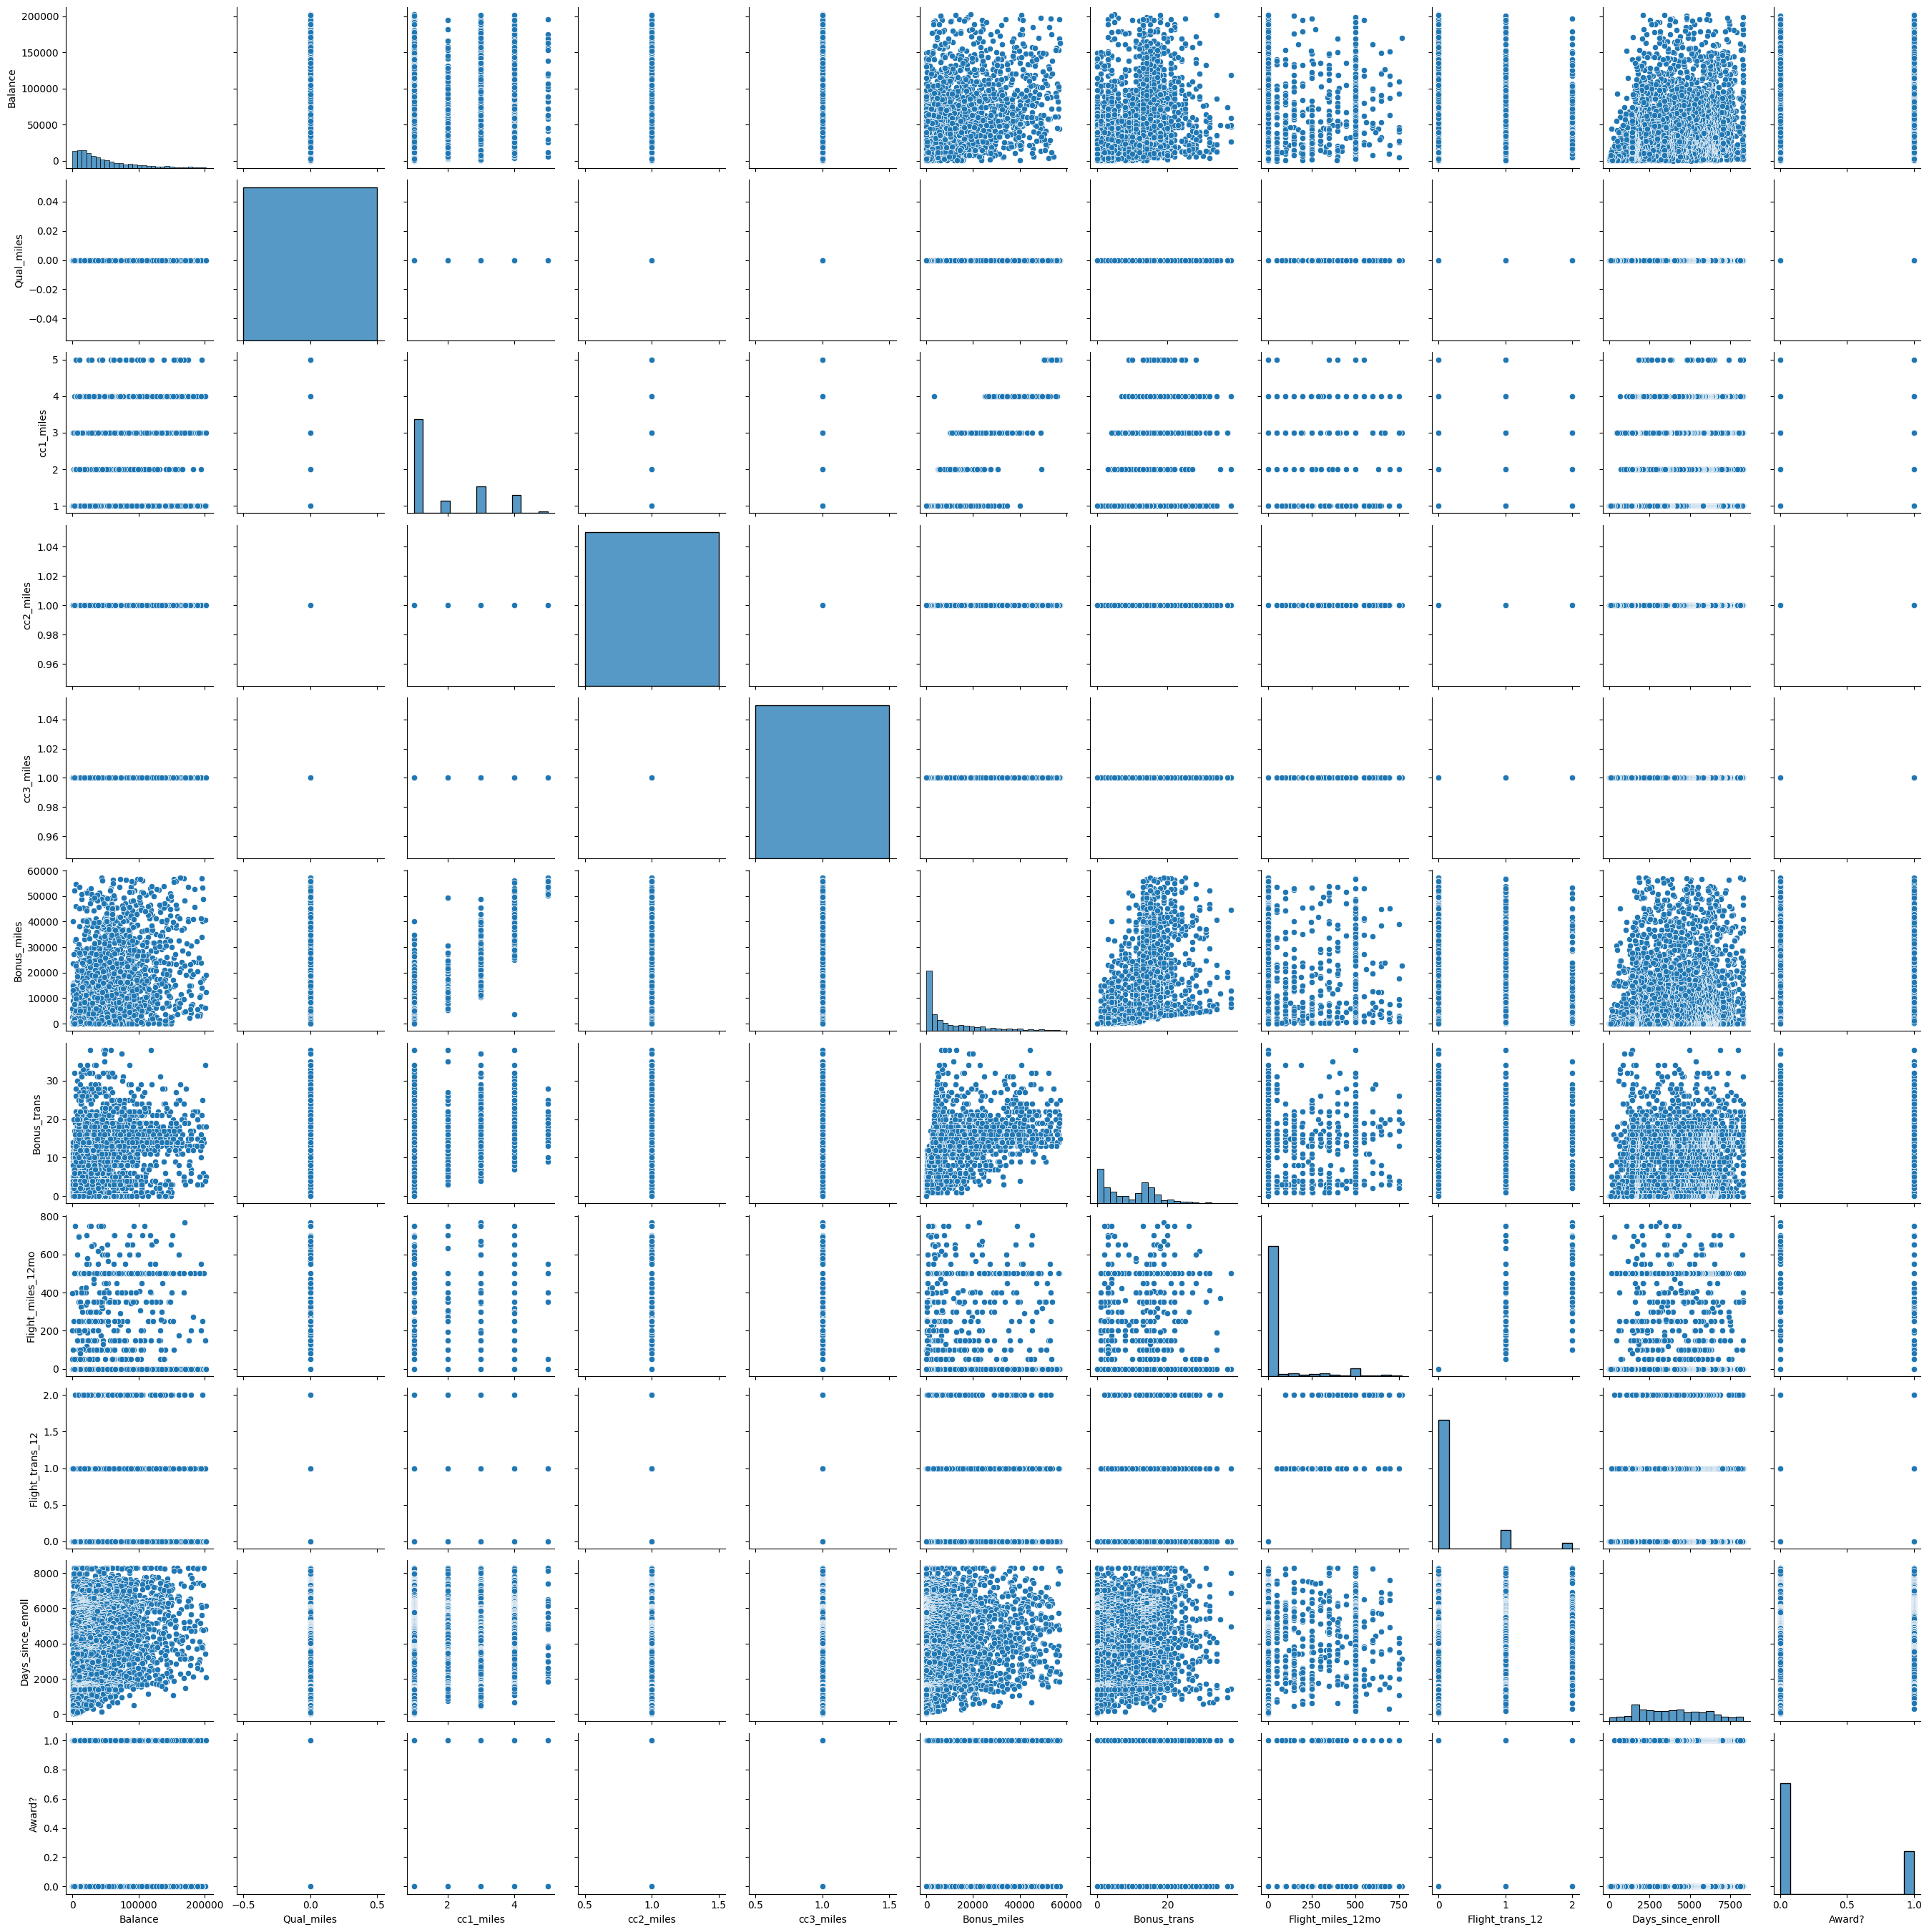

In [64]:
#pairplot
sns.pairplot(df_clean)
plt.show()

From above given dataset the EDA insights are :

1.the given data has no missing values and no duplicated rows in the data

2.we have remove the outliers from the given data as we can see frst there are 3999 rows in the data after removing the outliers the data ha snow rows of 2875

3.from the heatmap we can say that the cc1_miles and bouns_miles has high positive correlation of 0.91

4. adn flight_miles_12mon and flight_trans_12 has the correaltion of 0.86 and viceverse

5. the given data has dne with scaling techinque now we can apply the clustering on the dataset


Implementing Clustering Algorithms:
•	Implement the K-Means and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn.
•	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
•	Experiment with different parameter settings for K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.



In [65]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
sil_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)

    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(df_scaled, kmeans.labels_))

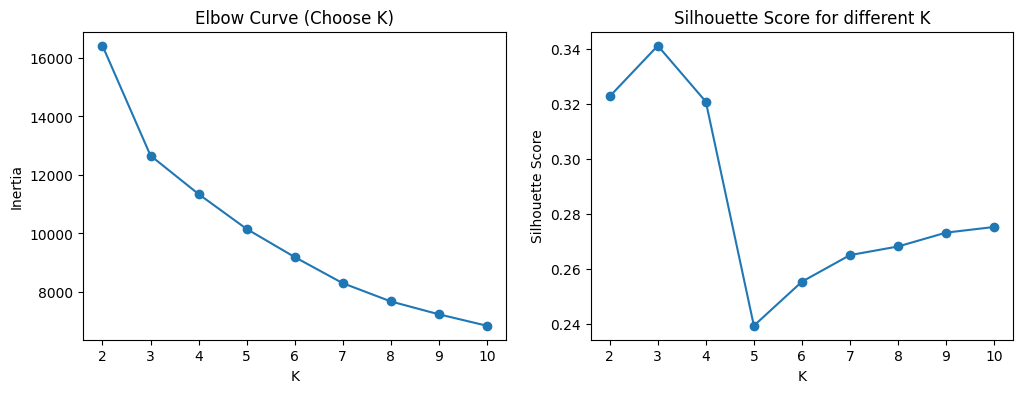

In [66]:
#plotting the elbow and silhouetter score
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(K_range, inertias, '-o')
plt.title("Elbow Curve (Choose K)")
plt.xlabel("K")
plt.ylabel("Inertia")

plt.subplot(1,2,2)
plt.plot(K_range, sil_scores, '-o')
plt.title("Silhouette Score for different K")
plt.xlabel("K")
plt.ylabel("Silhouette Score")

plt.show()

from the above figures we can say that k=3 is the best one, because as we cansee the elbow curve there is a sharp decreasing in k=3 and the silhouette score also higher to 1. from the silhouette graph we can say that k=3 it has score of 0.34.


In [67]:
BEST_K = 3  # chosen using elbow + silhouette
X = df_clean.copy(deep=True)   # make a safe full copy
kmeans = KMeans(n_clusters=BEST_K, random_state=42, n_init=10)
X.loc[:, "kmeans_cluster"] = kmeans.fit_predict(df_scaled)


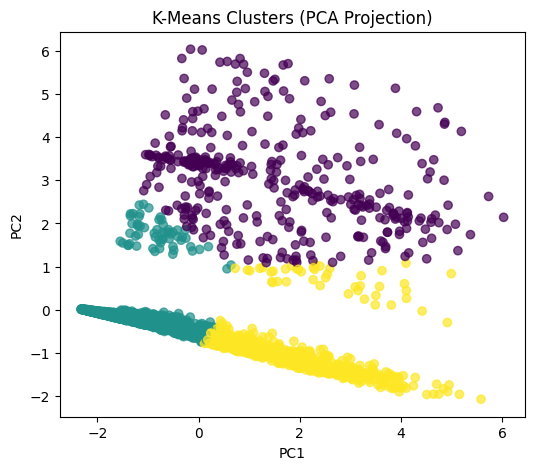

In [70]:
#visulaizing the k means
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_vals = pca.fit_transform(df_scaled)

plt.figure(figsize=(6,5))
plt.scatter(pca_vals[:,0], pca_vals[:,1], c=X["kmeans_cluster"], alpha=0.7)
plt.title("K-Means Clusters (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [71]:
#silhouette score
print("Silhouette Score:", silhouette_score(df_scaled, X["kmeans_cluster"]))


Silhouette Score: 0.3411147289284959


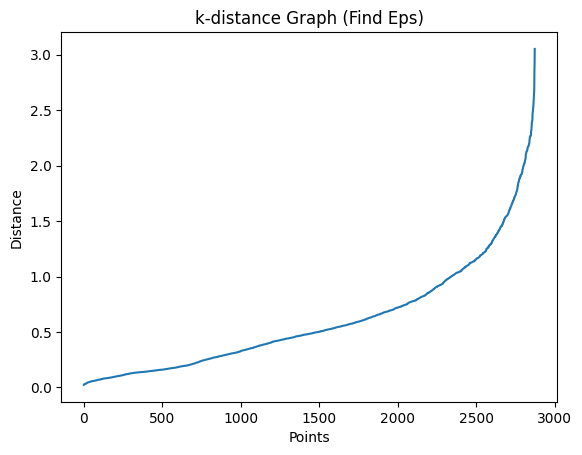

In [72]:
#DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)

distances = np.sort(distances[:,4])  # 4th nearest neighbor
plt.plot(distances)
plt.title("k-distance Graph (Find Eps)")
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()


from the above graph we can say that the eps values can be from 2 to 2.2


In [74]:
#applying dbscan with eps values
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=2, min_samples=5)  # update eps based on graph
db_labels = db.fit_predict(df_scaled)

X["dbscan_cluster"] = db_labels


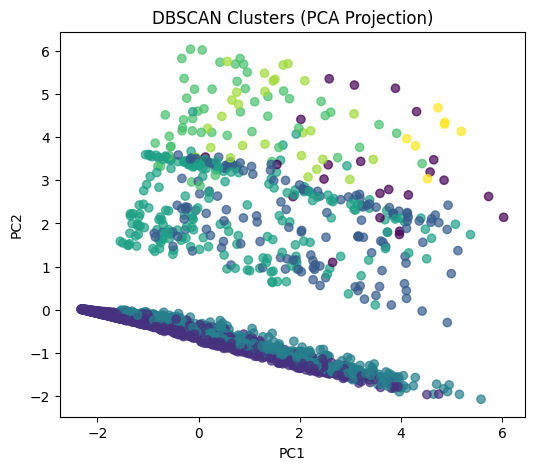

In [76]:
plt.figure(figsize=(6,5))
plt.scatter(pca_vals[:,0], pca_vals[:,1], c=X["dbscan_cluster"], alpha=0.7)
plt.title("DBSCAN Clusters (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [80]:
unique_clusters = np.unique(X["dbscan_cluster"])
print("Clusters found:", unique_clusters)

if len(unique_clusters) > 1:
    print("Silhouette Score:", silhouette_score(df_scaled, db_labels))
else:
    print("Silhouette Score not valid (only 1 cluster detected)")


Clusters found: [-1  0  1  2  3  4  5  6]
Silhouette Score: 0.2593549109206462


from the above dbscan we got 7 clusters detected and -1 is a noise/outlier we cannot detected as a cluster and the silhouetter score of 0.259

Cluster Analysis and Interpretation:
•	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.




In [82]:
#count points in each cluster
print(X['kmeans_cluster'].value_counts())

kmeans_cluster
1    1626
2     888
0     361
Name: count, dtype: int64


In [84]:
print(X['dbscan_cluster'].value_counts())

dbscan_cluster
 0    1805
 2     608
 3     204
 1     146
 4      55
 5      27
-1      23
 6       7
Name: count, dtype: int64


In [86]:
num_cols=df_clean.columns

In [87]:
cluster_summary = X.groupby("kmeans_cluster")[num_cols].mean()
print(cluster_summary)


                     Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
kmeans_cluster                                                              
0               65332.950139         0.0   2.066482        1.0        1.0   
1               28387.965560         0.0   1.065191        1.0        1.0   
2               73110.167793         0.0   3.134009        1.0        1.0   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
kmeans_cluster                                                                  
0               14537.329640    11.789474         422.994460         1.301939   
1                2605.075646     5.248462           4.285978         0.035670   
2               24522.349099    15.984234           5.011261         0.048423   

                Days_since_enroll    Award?  
kmeans_cluster                               
0                     4098.351801  0.443213  
1                     3547.711562  0.132841  
2                     45

In [88]:
dbscan_summary = X.groupby("dbscan_cluster")[num_cols].mean()
print(dbscan_summary)


                      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
dbscan_cluster                                                               
-1              114480.913043         0.0   2.913043        1.0        1.0   
 0               42801.730194         0.0   1.567867        1.0        1.0   
 1               52636.171233         0.0   2.493151        1.0        1.0   
 2               47380.332237         0.0   2.444079        1.0        1.0   
 3               65326.534314         0.0   1.813725        1.0        1.0   
 4               51351.872727         0.0   1.400000        1.0        1.0   
 5               63314.666667         0.0   1.444444        1.0        1.0   
 6               60441.000000         0.0   4.000000        1.0        1.0   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
dbscan_cluster                                                                  
-1              23597.782609    20.086957         374.608

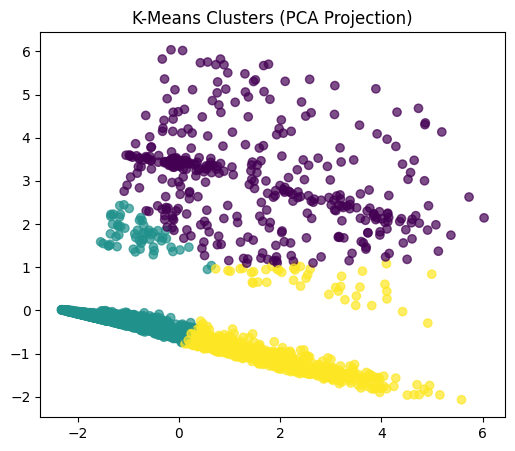

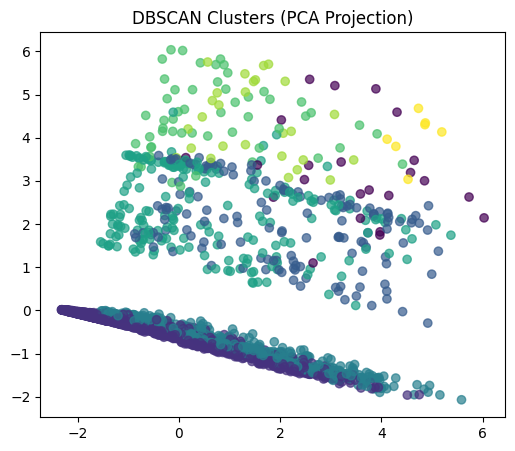

In [89]:
plt.figure(figsize=(6,5))
plt.scatter(pca_vals[:,0], pca_vals[:,1], c=X["kmeans_cluster"], alpha=0.7)
plt.title("K-Means Clusters (PCA Projection)")
plt.show()

plt.figure(figsize=(6,5))
plt.scatter(pca_vals[:,0], pca_vals[:,1], c=X["dbscan_cluster"], alpha=0.7)
plt.title("DBSCAN Clusters (PCA Projection)")
plt.show()


# K-Means clusters
# Cluster 0: Majority of data points with medium values for most features.
# Cluster 1: Possibly high-value group with higher values in certain features (e.g., income, spending, etc.).
# Cluster 2: Lower-value group with lower values in some key features.



# DBSCAN clusters
# Cluster 0: Large cluster with average profile (most data points).
# Cluster 1: Smaller cluster, e.g., high-value or special segment.
# Cluster 2: Another distinct group, maybe low-income or low-usage group.
# Cluster 3: Unique cluster with some extreme/high values.
# Cluster 4: Another distinct pattern (medium-high values in some features).
# Cluster 5: Small, specialized group (rare profile).
# Cluster 6: Small cluster (could be niche segment).
# -1: Noise points / outliers (unusual or inconsistent data entries).



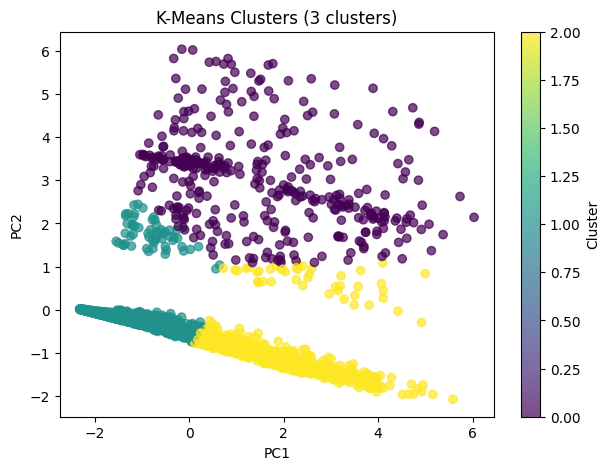

In [90]:
plt.figure(figsize=(7,5))
plt.scatter(
    pca_vals[:,0], pca_vals[:,1],
    c=X["kmeans_cluster"],   # cluster labels
    cmap='viridis',          # color map
    alpha=0.7
)
plt.title("K-Means Clusters (3 clusters)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.show()


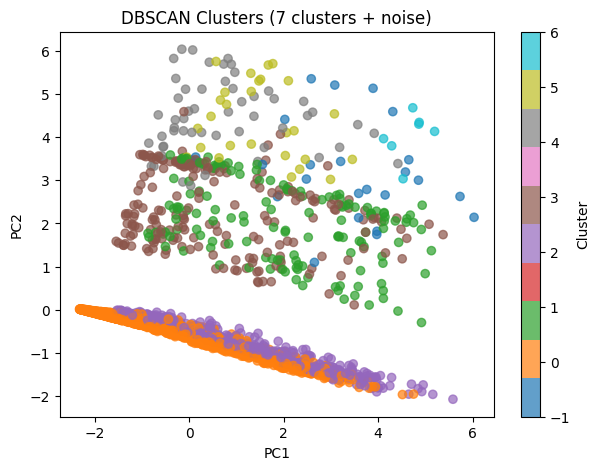

In [91]:
plt.figure(figsize=(7,5))
plt.scatter(
    pca_vals[:,0], pca_vals[:,1],
    c=X["dbscan_cluster"],   # DBSCAN cluster labels
    cmap='tab10',            # suitable for many clusters
    alpha=0.7
)
plt.title("DBSCAN Clusters (7 clusters and noise)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.show()


Evaluation and Performance Metrics:
Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN



In [ ]:
#from the above k means and the dbscan we calculated their sihouette score
# for k means we have a score of 0.34 which means the data is moderated separated
# from dbscan we can say that the score is 0.25 which means we have some presenes of noise or  overlapping cluster


#K-Means gives simpler, more cohesive clusters.
#DBSCAN captures more detailed structure and identifies outliers, but internal metrics are lower due to noise.